In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn import metrics
import seaborn as sns
import math 

In [95]:
data = pd.read_csv('datos_limpios.csv') 

In [96]:
data_case = data.copy()

In [97]:
data_case['Above Average'] = data_case['Salary'] > 115000
#data_case['Above Average'] = pd.get_dummies(data_case['Above Average'], drop_first= True)
data_case['Above Average'] = data_case['Above Average'].astype(int)
data_case


,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Above Average
0,1.0,1.0,177.0,5.0,90000.0,3,9,0
1,0.0,2.0,18.0,3.0,65000.0,4,5,0
2,0.0,1.0,116.0,7.0,60000.0,4,5,0
3,1.0,1.0,94.0,2.0,55000.0,4,5,0
4,0.0,2.0,107.0,12.0,120000.0,4,1,1
...,...,...,...,...,...,...,...,...
6244,0.0,3.0,34.0,20.0,200000.0,3,7,1
6245,1.0,0.0,116.0,3.0,50000.0,0,2,0
6246,0.0,1.0,42.0,4.0,55000.0,2,4,0
6247,1.0,2.0,97.0,14.0,140000.0,2,6,1


c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


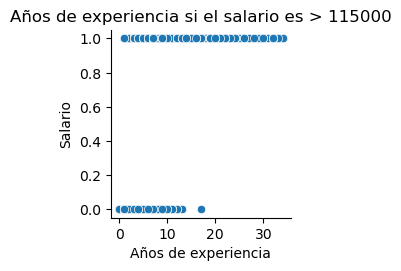

In [98]:
x = data_case['Years of Experience']
y = data_case['Above Average']
sns.pairplot(data_case,x_vars=['Years of Experience'],y_vars=['Above Average'],kind='scatter')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.title('Años de experiencia si el salario es > 115000')
plt.show()

In [99]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
x_train, x_test = np.array(x_train).reshape(-1, 1), np.array(x_test).reshape(-1, 1)
y_train, y_test = np.array(y_train).reshape(-1, 1), np.array(y_test).reshape(-1, 1)

In [100]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)

c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [101]:
y_pred = lr.predict(x_test)
print('beta_0:',lr.intercept_)
print('beta_1:',lr.coef_)


beta_0: [-4.26584714]
beta_1: [[0.6148305]]


C:\Users\xavie\AppData\Local\Temp\ipykernel_2484\2320562467.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1+math.exp(-exponent))


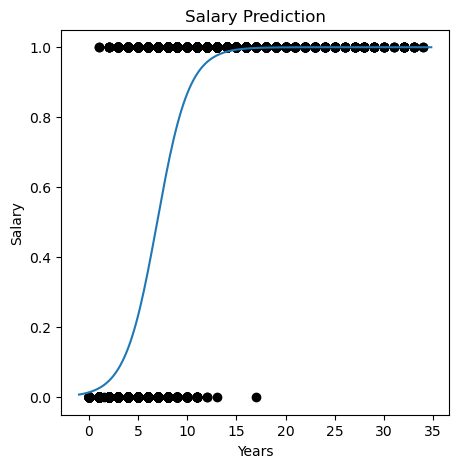

In [102]:
def model(x):
    exponent = lr.intercept_ + np.dot(lr.coef_[0], x)
    return 1/(1+math.exp(-exponent))

x = np.arange(-1, 35., 0.2)
sig = [model(i) for i in x]


plt.figure(figsize=(5,5))
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.scatter(data_case['Years of Experience'], data_case['Above Average'], c='black')
plt.plot(x,sig)
plt.show()

Text(0.5, 1.0, 'Confusion matrix')

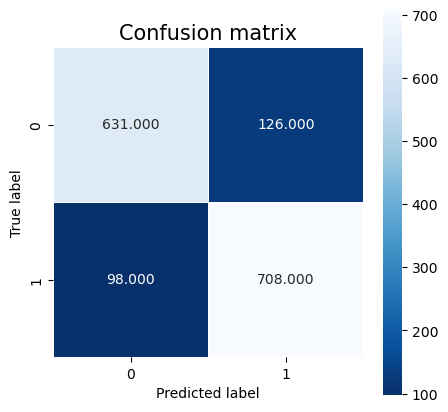

In [103]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)

In [104]:

x = data_case.drop(['Salary', 'Above Average'], axis=1)
y = data_case['Above Average']
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print('beta_0:',lr.intercept_)
print('beta_1:',lr.coef_)



beta_0: [-4.53192201]
beta_1: [[ 2.58644433e-01  2.99136742e-01 -3.72405941e-04  5.79766378e-01
  -4.04245598e-02  1.82684332e-06]]


c:\Users\xavie\miniconda3\envs\datasc\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion matrix')

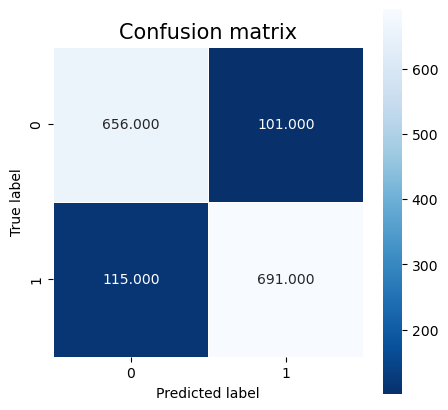

In [105]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix', size = 15)